In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import plotformat as pf
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

from pythonlib.generateplots import bestfit, sigfigs

############

        
temps = [10, 200]

# Generate plots for all ions...

In [3]:
def plotfit(self, axes, datastyle, fontsize=13):   
    gprecision = sigfigs((np.abs(self.G[1][-1]-self.G[0][-1]))/2)
    lstyls = ['-','-','-']
    colors = ['grey', pf.cpal1[2], pf.cpal1[0]]
    offs1 = np.max(self.simdata10[0])/4
    offs2 = np.max(self.simdata200[0])/4
    for i in range(3):
        #label = '$g_{xx} ='+str(np.around(np.abs(self.G[i][0]), gprecision))+\
        #        '$, $g_{zz} ='+str(np.around(np.abs(self.G[i][2]), gprecision))+'$'
        label = '$g_{zz} ='+str(np.around(np.abs(self.G[i][2]), gprecision))+'$'
        print(label)
        axes[0].errorbar(self.simdataX, self.simdata10[0]+offs1*i, self.simdata10[1], **datastyle)
        axes[1].errorbar(self.simdataX, self.simdata200[0]+offs2*i, self.simdata200[1],**datastyle)

        axes[0].plot(self.bestfitX, self.bestfit6[i]+offs1*i, ls=lstyls[i], color=colors[i])
        axes[1].plot(self.bestfitX, self.bestfit200[i]+offs2*i, ls=lstyls[i], color=colors[i])

        ## Plot labels
        axes[0].text(self.simdataX[-3],  np.max(self.bestfit6[i][-20:])+offs1*i, label, 
                     ha='right', va='bottom', color=colors[i], fontsize=fontsize)
        axes[1].text(self.simdataX[-3],  np.max(self.bestfit200[i][-20:])+offs2*i, label, 
                     ha='right', va='bottom', color=colors[i], fontsize=fontsize)
        if i == 0:
            axes[0].text(self.simdataX[-3],  np.max(self.bestfit6[i][-20:])+offs1*i,
                         'best fit'+' '*int(len(label)*1.4), 
                         ha='right', va='bottom', color=colors[i], fontsize=10)
            axes[1].text(self.simdataX[-3],np.max(self.bestfit200[i][-20:])+offs2*i,
                         'best fit'+' '*int(len(label)*1.4),
                         ha='right', va='bottom', color=colors[i], fontsize=10)
            
    for i in range(2):
        #axes[i].legend(fontsize=12, handlelength=1.1)
        axes[i].set_xlim(self.bestfitX[5], self.bestfitX[-1])

<IPython.core.display.Javascript object>


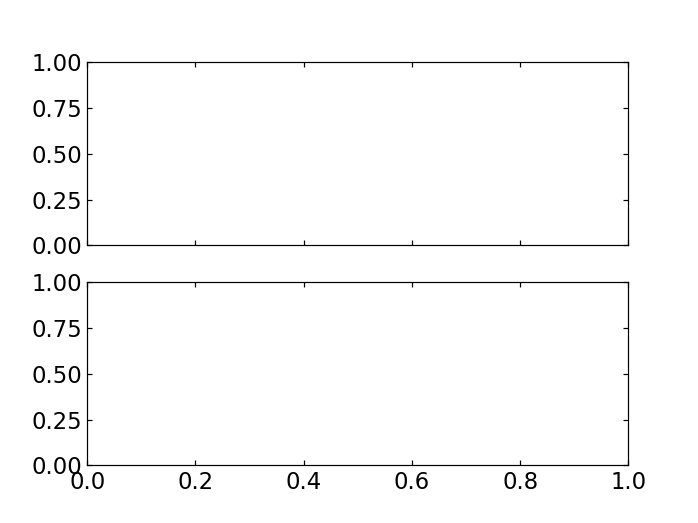

/home/1o1/Documents/PyCrystalField/UncertaintySimulations/CodeForPublication/pythonlib/generateplots.py:7: RuntimeWarning: divide by zero encountered in log10
  sigdigits = int(-np.log10(unc)+1)


<IPython.core.display.Javascript object>


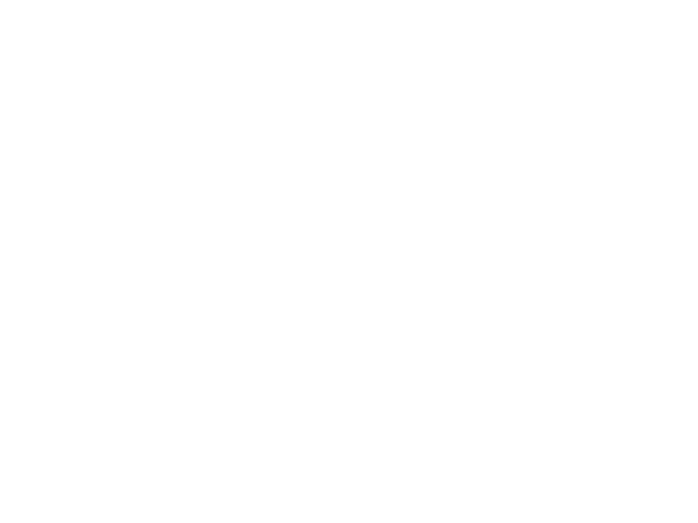

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =5.8$
$g_{zz} =5.6$
$g_{zz} =5.9$


<IPython.core.display.Javascript object>


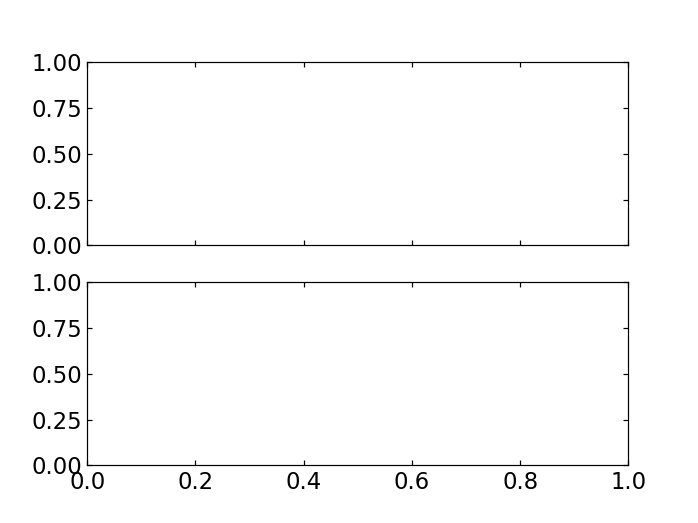

/home/1o1/Documents/PyCrystalField/UncertaintySimulations/CodeForPublication/pythonlib/generateplots.py:7: RuntimeWarning: divide by zero encountered in log10
  sigdigits = int(-np.log10(unc)+1)


<IPython.core.display.Javascript object>


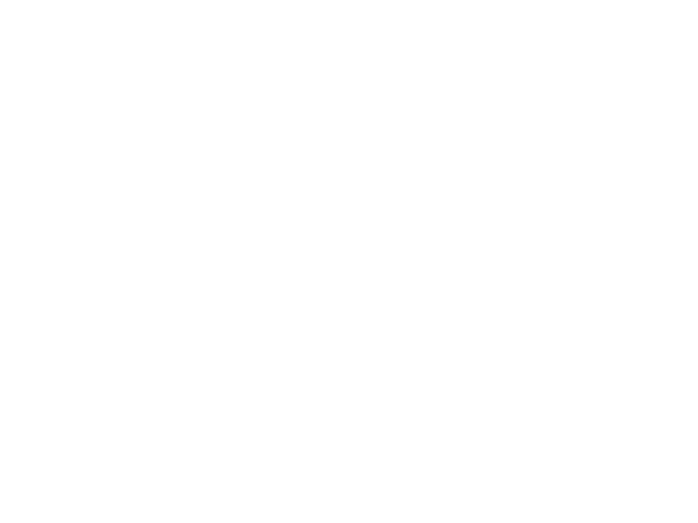

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =20.0$
$g_{zz} =4.0$
$g_{zz} =20.0$


<IPython.core.display.Javascript object>


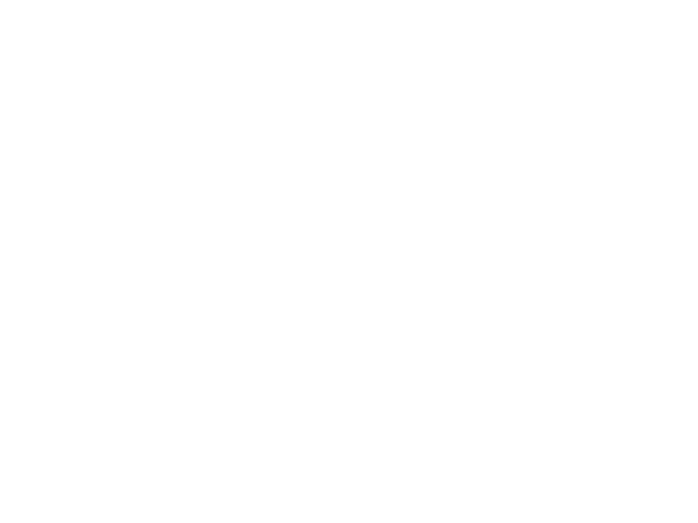

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =19.975$
$g_{zz} =19.967$
$g_{zz} =19.981$


<IPython.core.display.Javascript object>


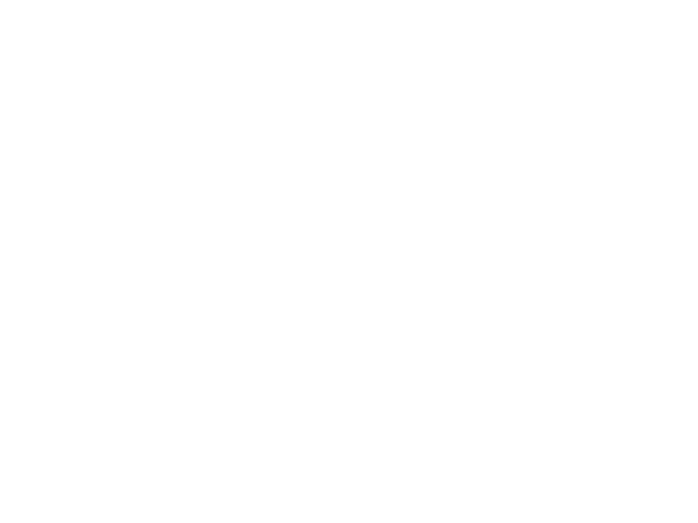

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =8.65$
$g_{zz} =8.59$
$g_{zz} =8.69$


<IPython.core.display.Javascript object>


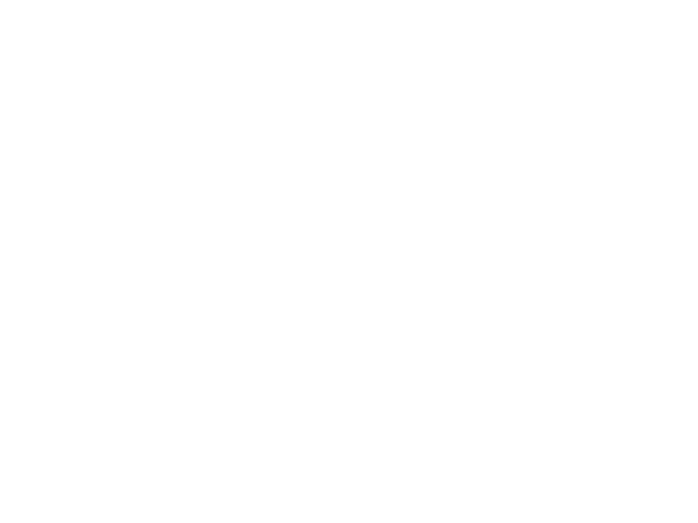

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =5.4$
$g_{zz} =5.2$
$g_{zz} =5.7$


<IPython.core.display.Javascript object>


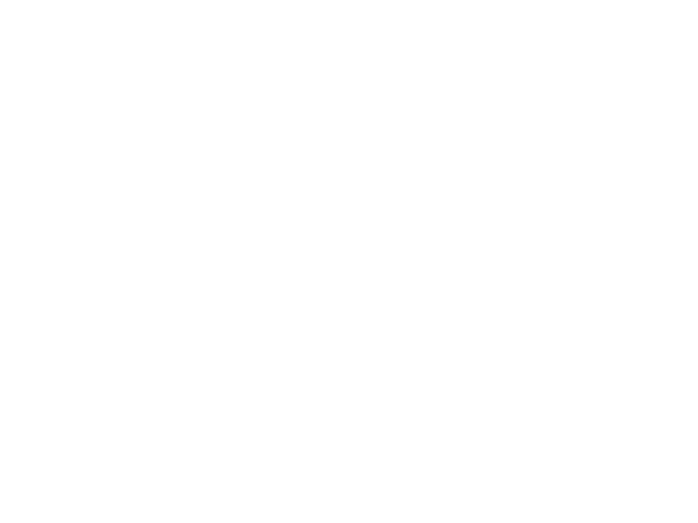

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =12.5$
$g_{zz} =12.46$
$g_{zz} =12.57$


<IPython.core.display.Javascript object>


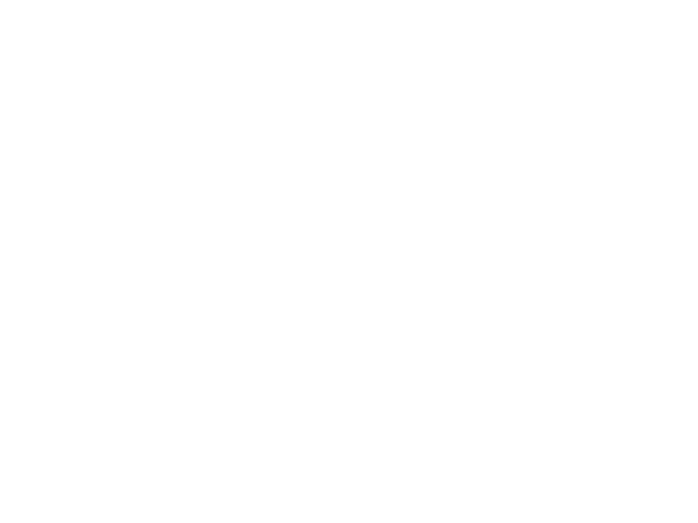

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =11.76$
$g_{zz} =11.62$
$g_{zz} =11.88$


<IPython.core.display.Javascript object>


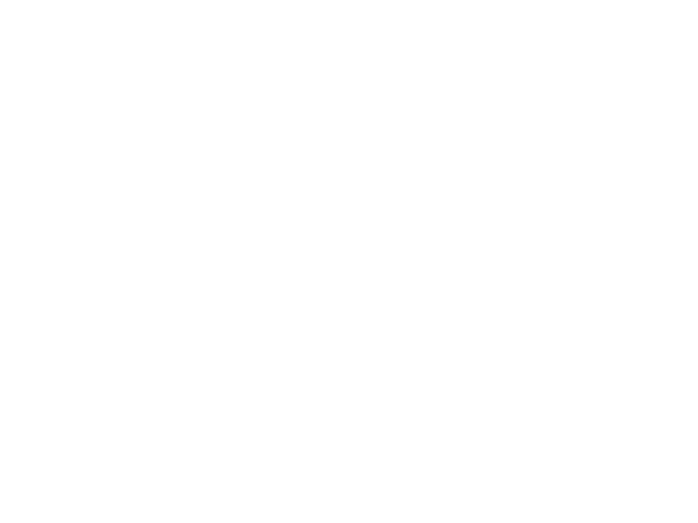

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =2.0$
$g_{zz} =0.7$
$g_{zz} =2.1$


In [4]:
ions = ['Sm','Nd','Ce','Dy','Ho','Tm','Pr','Er','Tb','Yb']

SaveDirec = 'paperfigures/PyrochloreComparisons/'

for ion in ions:
    BF = bestfit('Pyrochlore',ion)

    datastyle = dict(ls='none', capsize=1, color='k', zorder=-1, marker='.', ms=3)

    try:
        f, ax = plt.subplots(2,1, sharex=True)
        plotfit(BF, ax, datastyle)

        for i, axx in enumerate(ax):
            axx.legend( fontsize=13, handlelength=0.4,  frameon=False)
            axx.text(0.97, 0.93, '{} K'.format(temps[i]), transform=axx.transAxes, ha='right', va='top')
            axx.text(0.02,0.96, pf.parSubPlotLabel(i), transform=axx.transAxes, ha='left', va='top')
            axx.set_ylabel('$\\rm I$ (arb. u.)')
        ax[0].set_title('$\\rm '+ion+'_2Ti_2O_7$ simulated\nscattering', fontsize=15)
#         ax[0].text(0.03, 0.8, '$\\rm '+ion+'_2Ti_2O_7$ simulated\nscattering', fontsize=14,
#                    transform=ax[0].transAxes, ha='left', va='top')
        ax[-1].set_xlabel('$\\hbar \\omega$ (meV)')

        f.subplots_adjust(hspace=0.01)

        plt.savefig(SaveDirec+ion+'2Ti2O7.pdf', bbox_inches='tight', pad_inches = 0.02)
        plt.close()
    except OverflowError: pass

<IPython.core.display.Javascript object>


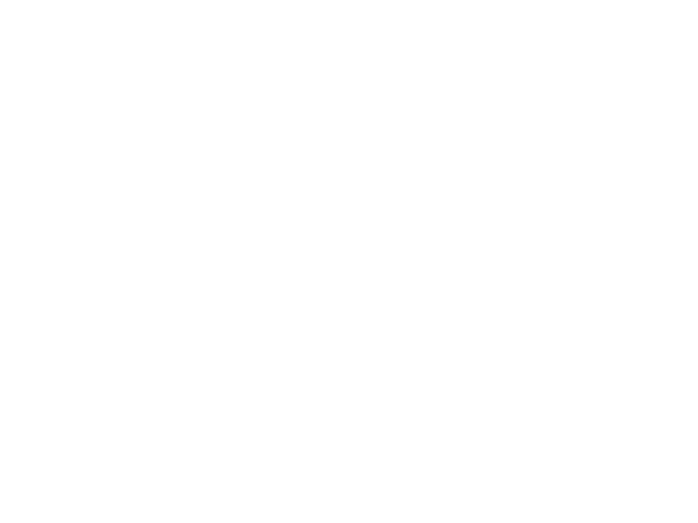

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =1.1$
$g_{zz} =0.2$
$g_{zz} =1.2$


<IPython.core.display.Javascript object>


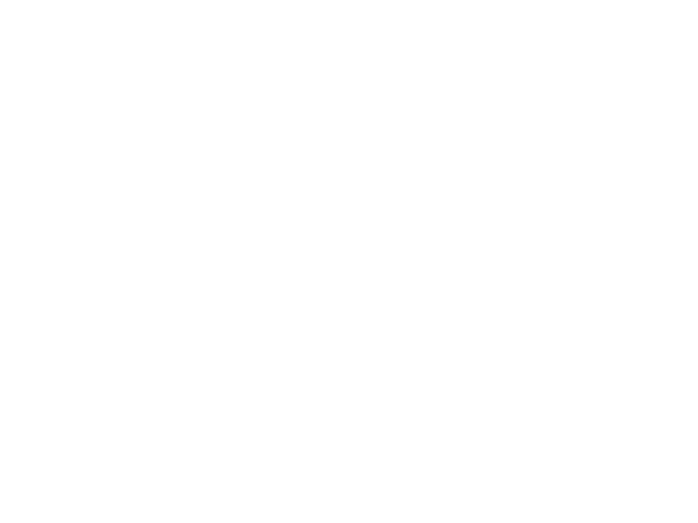

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =0.23$
$g_{zz} =0.05$
$g_{zz} =0.41$


<IPython.core.display.Javascript object>


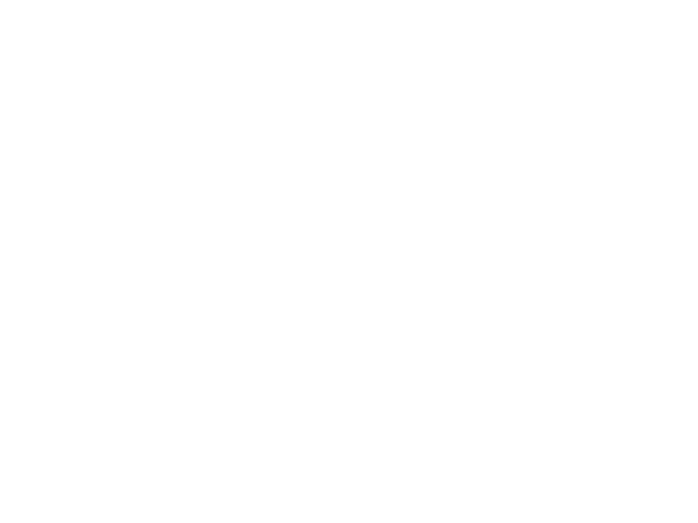

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =0.6$
$g_{zz} =0.3$
$g_{zz} =1.1$


<IPython.core.display.Javascript object>


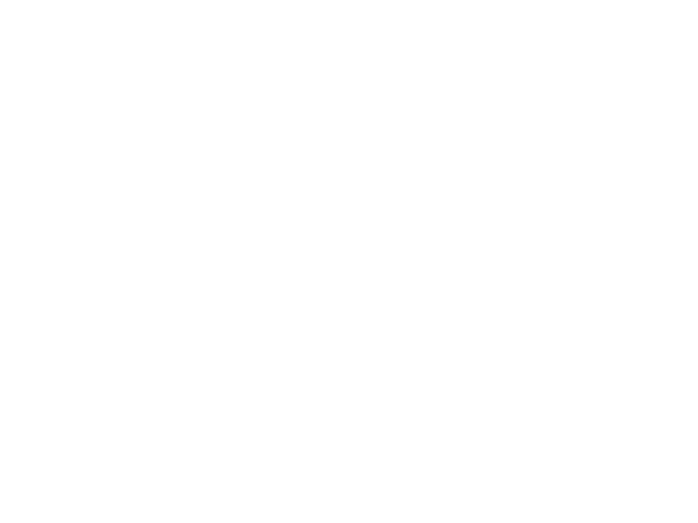

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =1.5$
$g_{zz} =0.9$
$g_{zz} =2.1$


<IPython.core.display.Javascript object>


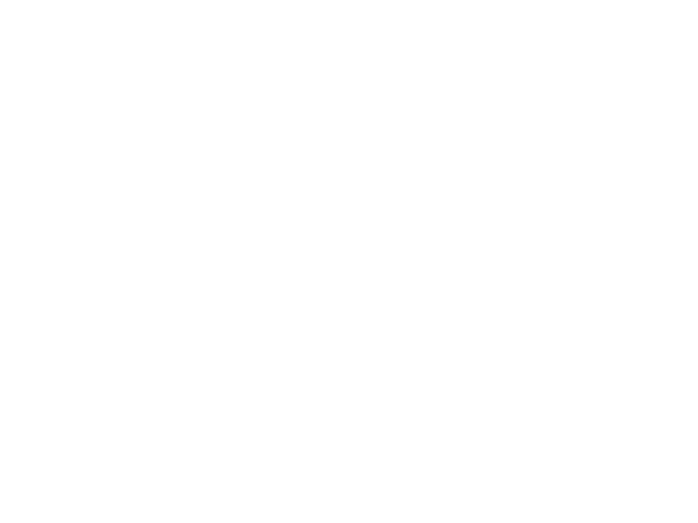

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =7.0$
$g_{zz} =3.0$
$g_{zz} =10.0$


<IPython.core.display.Javascript object>


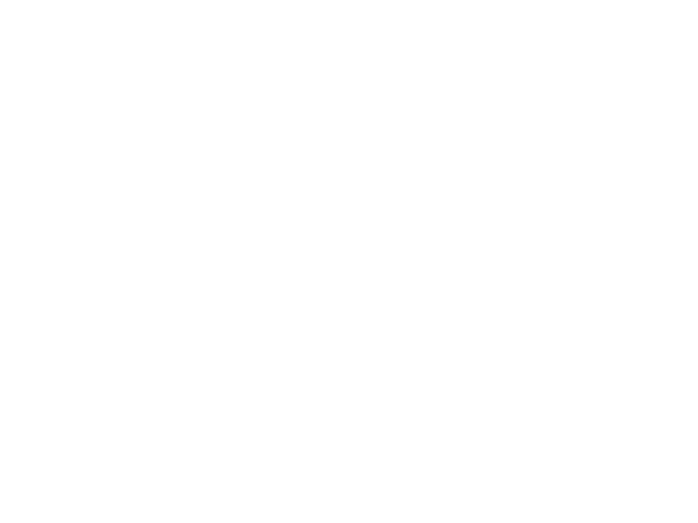

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =16.7$
$g_{zz} =14.4$
$g_{zz} =16.8$


<IPython.core.display.Javascript object>


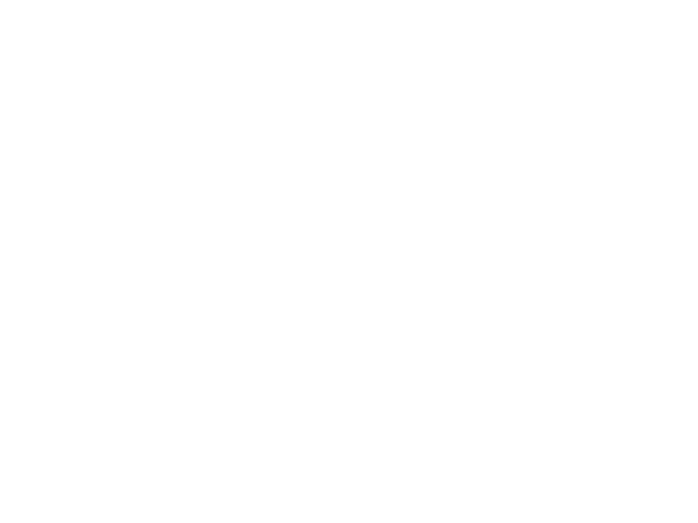

No handles with labels found to put in legend.
No handles with labels found to put in legend.


$g_{zz} =1.3$
$g_{zz} =0.5$
$g_{zz} =3.0$


In [5]:
ions = ['Sm','Nd','Ce','Dy','Ho','Tm','Pr','Er','Tb','Yb']

SaveDirec = 'paperfigures/DelafossiteComparisons/'

for ion in ions:
    try:
        BF = bestfit('Delafossite',ion)

        datastyle = dict(ls='none', capsize=1, color='k', zorder=-1, marker='.', ms=3)
        try:
            f, ax = plt.subplots(2,1, sharex=True)
            plotfit(BF, ax, datastyle)

            for i, axx in enumerate(ax):
                axx.legend( fontsize=13, handlelength=0.4,  frameon=False)
                axx.text(0.97, 0.93, '{} K'.format(temps[i]), transform=axx.transAxes, ha='right', va='top')
                axx.text(0.02,0.96, pf.parSubPlotLabel(i), transform=axx.transAxes, ha='left', va='top')
                axx.set_ylabel('$\\rm I$ (arb. u.)')
            ax[0].set_title('$\\rm Na'+ion+'Se_2$ simulated\nscattering', fontsize=15)
    #         ax[0].text(0.03, 0.8, '$\\rm '+ion+'_2Ti_2O_7$ simulated\nscattering', fontsize=14,
    #                    transform=ax[0].transAxes, ha='left', va='top')
            ax[-1].set_xlabel('$\\hbar \\omega$ (meV)')

            f.subplots_adjust(hspace=0.01)

            plt.savefig(SaveDirec+'Na'+ion+'Se2.pdf', bbox_inches='tight', pad_inches = 0.02)
            plt.close()
        except OverflowError: pass
    except OSError: pass